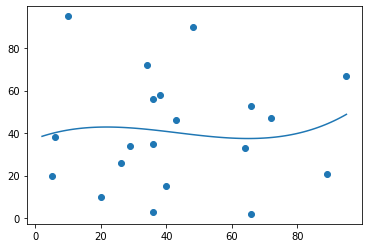

In [2]:
# bad fit
import numpy as np 
import matplotlib.pyplot as plt 

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

badmodel= np.poly1d(np.polyfit(x,y,3))

badline= np.linspace(2,95,100)

plt.scatter(x,y)
plt.plot(badline,badmodel(badline))
plt.show()

In [3]:
# R-squared for bad fit
from sklearn.metrics import r2_score
model= np.poly1d(np.polyfit(x,y,3))
print(r2_score(y,model(x)))

0.009952707566680652


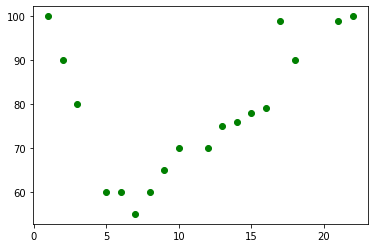

In [18]:
# Step 1: Data  
a = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,17,21,22]
b = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
plt.scatter(a,b,color='green')
plt.show()

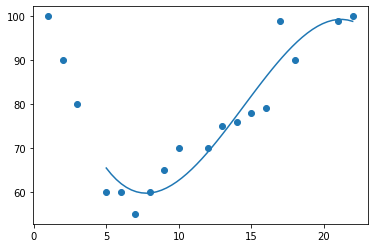

In [19]:
# Step2: Draw the line 
gdmodel= np.poly1d(np.polyfit(a,b,3))
gdline = np.linspace(5,22)
plt.scatter(a,b)
plt.plot(gdline,gdmodel(gdline))
plt.show()

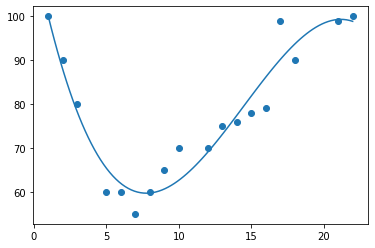

In [20]:
# Step2: Draw the line 
gdmodel= np.poly1d(np.polyfit(a,b,3))
gdline = np.linspace(1,22,100) # This is from Codanics
plt.scatter(a,b)
plt.plot(gdline,gdmodel(gdline))
plt.show()

In [21]:
# Step3 : Rsquared
model=np.poly1d(np.polyfit(a,b,3))
print(r2_score(b,model(a)))

0.9227327679374369


In [23]:
model(39)

-294.3939817962772

## Hands On Example

In [32]:
import pandas as pd 
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [33]:
# Splitting the dataset into the Training set and Test set 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

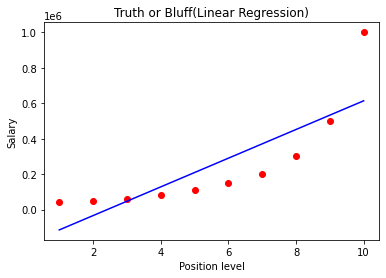

In [40]:
# fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(X,y)
reg 
# Visualizing the Linear Regression results 
def viz_linear():
    plt.scatter(X,y,color='red')
    plt.plot(X,reg.predict(X),color='blue')
    plt.title('Truth or Bluff(Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return 
viz_linear()

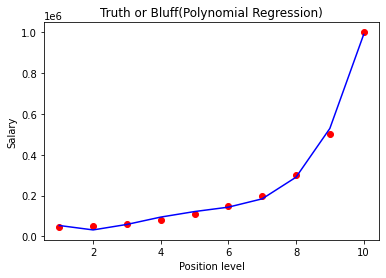

In [41]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg=LinearRegression().fit(X_poly,y)
pol_reg

# Visualizing the Polynomial Regression results 
def viz_polynomial():
    plt.scatter(X,y,color='red')
    plt.plot(X,pol_reg.predict(poly_reg.fit_transform(X)),color='blue')
    plt.title('Truth or Bluff(Polynomial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polynomial()
    

In [44]:
# Predicting a new result with Linear Regression 
pred_linear = reg.predict([[11]])

array([694333.33333333])

In [45]:
# Prediction a new result with Polynomial Regression 
pred_polynomial = pol_reg.predict(poly_reg.transform([[11]])) 

In [46]:
print('Linear Regression Results  =' ,pred_linear)
print('Polnomial Regression Results  =', pred_polynomial)

print('The Difference is  =',pred_polynomial-pred_linear)

Linear Regression Results  = [694333.33333333]
Polnomial Regression Results  = [1780833.33333359]
The Difference is  = [1086500.00000025]
